In [3]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

Formatting and Cleaning

In [4]:
#cleaning
demo = pd.read_csv('base_dfs/df_final_demo.csv')
demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [5]:
# visualize nulls 
demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [6]:
# Rows with null values
demo.loc[demo["clnt_age"].isna()]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# find the client_id that are missing all values
nullRows = demo.loc[demo['bal'].isna()]['client_id'].values

In [8]:
# drop row with null values
demo.dropna(thresh=7, inplace=True)

In [9]:
# cleaning column names and fill null value in age, replace X to U (unknown)
demo.rename(columns={'gendr': 'gender'}, inplace=True)
demo.rename(columns= {'clnt_tenure_yr':'tenure_years'}, inplace = True)
demo.rename(columns= {'clnt_tenure_mnth':'tenure_month'}, inplace = True)
demo.rename(columns= {'clnt_age':'age'}, inplace = True)
demo.rename(columns= {'gendr':'gender'}, inplace = True)
demo.rename(columns= {'calls_6_mnth':'calls'}, inplace = True)
demo.rename(columns= {'logons_6_mnth':'logons'}, inplace = True)
demo['age'].fillna(round(demo['age'].mean()), inplace=True)
demo['gender'].replace({'X': 'U'}, inplace=True)

In [10]:
#cleaning group_type
group_type = pd.read_csv('base_dfs/df_final_experiment_clients.csv')
group_type

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [11]:
# amount of NaN
group_type.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [12]:
# function to find the index of the client ids that was null in demo
def indexfinder(values, df):
    indexer = []

    for value in values:
        i = df.loc[df['client_id'] == value].index
        indexer.append(i)

    return [x[0] for x in indexer]

list(nullRows)

[7402828,
 355337,
 8412164,
 2222915,
 4876926,
 5277910,
 7616759,
 8191345,
 1227228,
 8611797,
 5144725,
 1037867,
 1618749,
 6021001]

In [13]:
# changing name of the column, fill all NaN and droping the client ids with null values of the demo
group_type.rename(columns={'Variation': 'group_type'}, inplace=True)
group_type.drop(indexfinder(nullRows, group_type), inplace=True)
group_type.fillna('Unknow', inplace=True)

In [76]:
group_type["client_id"].value_counts().sum()

70595

In [15]:
#cleaning data 1
data1 = pd.read_csv('base_dfs\df_final_web_data_pt_1.csv')
data1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [16]:
#cleaning data 2
data2 = pd.read_csv('base_dfs\df_final_web_data_pt_2.csv')
data2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [17]:
# CONCATENATING THE 2 PARTS OF THE "DIGITAL FOOTPRINTS"
webdata = pd.concat([data1, data2], axis=0).reset_index(drop=True)
webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [18]:
webdata.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [19]:
# drop duplicates and the client ids with null values on demo
webdata.drop_duplicates(inplace=True)
webdata.drop(indexfinder(nullRows, webdata), inplace=True)

In [20]:
# formatting date time
webdata['date_time'] = pd.to_datetime(webdata['date_time'])

In [21]:
# filtering to client ids on demo
unique_client_id= demo["client_id"].to_list()
webdata2 = webdata.loc[webdata["client_id"].isin(unique_client_id)]
webdata2
webdata2['client_id'].nunique()

70595

In [65]:
# webdata2

Import to SQL

In [22]:
# import mysql.connector
# from getpass import getpass
# from sqlalchemy import create_engine

In [23]:
# # get connected to the sql 

# host= '127.0.0.1'
# pw= getpass()
# user= 'root'

# conn = mysql.connector.connect(host= host, user= user, password= pw)

In [24]:
#now are creating a cursor, that will hold our query, execute it, and fetch results

# cursor = conn.cursor()

In [25]:
# # querying the database to sql

# query = """CREATE DATABASE IF NOT EXISTS project;"""

# cursor.execute(query)

# query1 = "SHOW DATABASES"
# cursor.execute(query1)
# cursor.fetchall()

In [26]:
# #sending to sql
# eng3 = create_engine(f'mysql+pymysql://{user}:{pw}@{host}/project')
# webdata.to_sql('webdata', con= eng3)

In [27]:
# #sending to sql
# eng2 = create_engine(f'mysql+pymysql://{user}:{pw}@{host}/project')
# group_type.to_sql('group_type', con= eng2)

In [28]:
# #sending to sql
# eng = create_engine(f'mysql+pymysql://{user}:{pw}@{host}/project')
# demo.to_sql('demo', con= eng)

DESCRIPTIVE STATS

FUNCTIONS

In [186]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as st

In [30]:
# filter of diferent group types
gt_test=group_type[group_type["group_type"]=="Test"]
gt_control=group_type[group_type["group_type"]=="Control"]
gt_unknown=group_type[group_type["group_type"]=="Unknow"]

In [31]:
# function to count the number of successful visits
def count_successful(df_webdata,grouptype):
    
    #filter the df to the grouptype
    grouptype_id=grouptype["client_id"].to_list()
    df_webdata_filter=df_webdata.loc[df_webdata["client_id"].isin(grouptype_id)]

    #create a groupby iterable
    grouped=df_webdata_filter.groupby("visit_id")

    count=0
    timespent_dict = dict()

    for name, group in grouped:  # iterating groupby object
        # print(f"Group name {name}")
        # display(group)
        my_df=pd.DataFrame(group.groupby("process_step").agg({"date_time":"max"}))

        my_dict=my_df.to_dict()

        try:
            if my_dict["date_time"]["confirm"]>my_dict["date_time"]["step_3"]:
                if my_dict["date_time"]["step_3"]>my_dict["date_time"]["step_2"]:
                    if my_dict["date_time"]["step_2"]>my_dict["date_time"]["step_1"]:
                        if my_dict["date_time"]["step_1"]>my_dict["date_time"]["start"]:
                            count+=1
                            time_spent=my_dict["date_time"]["confirm"]-my_dict["date_time"]["start"]
                            timespent_dict[name]=time_spent
        
        except:
            pass
    return (len(grouptype_id), df_webdata_filter["visit_id"].nunique(), count, timespent_dict,
print("index [0] - Number of client_id's:"), print(len(grouptype_id)),
print("index [1] - Number of visit_id's: "), print(df_webdata_filter["visit_id"].nunique()),
print("index [2] - Number of successful op.: "), print(count), 
print("index [3] - Timespent per visit_id: "), print(timespent_dict))

In [32]:
count_control=count_successful(webdata2,gt_control)
count_test=count_successful(webdata2,gt_test)

index [0] - Number of client_id's:
23527
index [1] - Number of visit_id's: 
32183
index [2] - Number of successful op.: 
14006
index [3] - Timespent per visit_id: 
{'10007589_47780784567_391490': Timedelta('0 days 00:12:01'), '100254180_47139859079_984581': Timedelta('0 days 00:05:41'), '100309269_21684743336_936307': Timedelta('0 days 00:04:00'), '100471971_3065983298_584030': Timedelta('0 days 00:02:34'), '100481857_71511233596_788753': Timedelta('0 days 00:12:56'), '100608591_65788886975_921579': Timedelta('0 days 00:01:44'), '100733473_61604582110_215085': Timedelta('0 days 00:05:35'), '100742196_25888718318_18393': Timedelta('0 days 00:02:24'), '100768839_4432812320_405870': Timedelta('0 days 00:07:27'), '100911179_58982643631_833777': Timedelta('0 days 00:04:55'), '100982387_94833499276_254813': Timedelta('0 days 00:03:00'), '101120116_70489660261_84827': Timedelta('0 days 00:07:13'), '101127163_76213781950_64100': Timedelta('0 days 00:04:22'), '101143883_71782939078_772553': Tim

In [33]:
# function to count the number of unsuccessful regarding the timestamp
def count_error_timestamps(df_webdata,grouptype):
    
    #filter the df to the grouptype
    grouptype_id=grouptype["client_id"].to_list()
    df_webdata_filter=df_webdata.loc[df_webdata["client_id"].isin(grouptype_id)]

    #create a groupby iterable
    grouped=df_webdata_filter.groupby("visit_id")

    count=0
   
    for name, group in grouped:  # iterating groupby object
        # print(f"Group name {name}")
        # display(group)
        my_df=pd.DataFrame(group.groupby("process_step").agg({"date_time":"max"}))

        my_dict=my_df.to_dict()
        
        
        try: # we could have used "or" instead of "elif"
            if my_dict["date_time"]["confirm"] < my_dict["date_time"]["step_3"]:
                count+=1            
            elif my_dict["date_time"]["step_3"] < my_dict["date_time"]["step_2"]:
                count+=1                
            elif my_dict["date_time"]["step_2"] < my_dict["date_time"]["step_1"]:
                count+=1                
            elif my_dict["date_time"]["step_1"] < my_dict["date_time"]["start"]:
                count+=1
        except:
            pass
    return (len(grouptype_id), df_webdata_filter["visit_id"].nunique(), count, print(f"""index [0] - Number of client_id's:{len(grouptype_id)}
index [1] - Number of visit_id's: {df_webdata_filter["visit_id"].nunique()}
index [2] - Number of error timestamps op.: {count}"""))

In [85]:
error_timestamps=count_error_timestamps(webdata2,gt_control)
error_timestamps=count_error_timestamps(webdata2,gt_test)

index [0] - Number of client_id's:23527
index [1] - Number of visit_id's: 32183
index [2] - Number of error timestamps op.: 595
index [0] - Number of client_id's:26961
index [1] - Number of visit_id's: 37122
index [2] - Number of error timestamps op.: 326


In [81]:
# function to count the number of visits that return to "start"
def return_to_start(df_webdata,grouptype):
    
    #filter the df to the grouptype
    grouptype_id=grouptype["client_id"].to_list()
    df_webdata_filter=df_webdata.loc[df_webdata["client_id"].isin(grouptype_id)]

    #create a groupby iterable
    grouped=df_webdata_filter.groupby("visit_id")

    count=0

    error_start_dict = dict()
   
    for name, group in grouped:  # iterating groupby object
        # print(f"Group name {name}")
        # display(group)
        max_start_0 = pd.DataFrame(group.groupby("process_step").agg({"date_time":"max"})).reset_index()
        max_start_1=max_start_0[max_start_0["process_step"]=="start"]#["date_time"]
        max_start_1=max_start_1[max_start_1["process_step"]=="start"].reset_index(drop=True).drop(columns="process_step")


        my_df=pd.DataFrame(group.groupby("process_step").agg({"date_time":"min"}))

        my_dict=my_df.to_dict()
        
        
        try: # we could have used "or" instead of "elif"
            if pd.Series(my_dict["date_time"]["confirm"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1             
            elif pd.Series(my_dict["date_time"]["step_3"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1                 
            elif pd.Series(my_dict["date_time"]["step_2"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1                 
            elif pd.Series(my_dict["date_time"]["step_1"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1 
        except:
            pass
    return (len(grouptype_id), df_webdata_filter["visit_id"].nunique(),count, error_start_dict,
print("index [0] - Number of client_id's: "), print(len(grouptype_id)),
print("index [1] - Number of visit_id's: "), print(df_webdata_filter["visit_id"].nunique()),
print("index [2] - Number of error return to 'start' op.: "), print(count),
print("index [3] - Dict of error return to 'start'"), print(error_start_dict))

In [82]:
error_start_control = return_to_start(webdata2,gt_control)
error_start_test = return_to_start(webdata2,gt_test)

index [0] - Number of client_id's: 
23527
index [1] - Number of visit_id's: 
32183
index [2] - Number of error return to 'start' op.: 
1660
index [3] - Dict of error return to 'start'
{'101143883_71782939078_772553': 1, '101943895_86775091670_183092': 1, '10195285_83113954302_914786': 1, '103049564_53637551445_140548': 1, '103609069_67444114796_723567': 1, '103962335_25060963174_327284': 1, '104222319_64628836240_918404': 1, '105267422_78903782197_367795': 1, '105458872_73633905256_530797': 1, '105727237_33299933441_343945': 1, '106188542_73791453439_396070': 1, '106679528_83928157480_253697': 1, '106728830_24796395479_680506': 1, '108631730_52513210497_452167': 1, '10871633_1705641651_226934': 1, '110188436_84937351201_276106': 1, '110307202_34636181112_192510': 1, '110503428_41861954003_178066': 1, '112962802_60410211013_678851': 1, '113119512_8308234673_482793': 1, '113210214_41722402972_182737': 1, '113266577_6180033811_938815': 1, '114885457_41447361034_760968': 1, '115049717_8218

INFERENTIAL STATS - COMPLETION RATE

In [37]:
my_dict = {"Title":["complete","not complete"], "Control": [count_control[2],count_control[1]-count_control[2]], "Test": [count_test[2],count_test[1]-count_test[2]]}

In [38]:
my_df =pd.DataFrame(my_dict)
my_df.set_index("Title")

,Control,Test
Title,,
complete,14006,17474
not complete,18177,19648


In [39]:
my_df.set_index("Title", inplace = True)

In [40]:
my_df

,Control,Test
Title,,
complete,14006,17474
not complete,18177,19648


In [41]:
chi2_contingency(my_df)
# there is a significance association between complete/non complete and the type of test (control,teste)
# completar o processo é depente do grupo em que se encontra

Chi2ContingencyResult(statistic=87.58546753265996, pvalue=8.071551885934096e-21, dof=1, expected_freq=array([[14618.29362961, 16861.70637039],
       [17564.70637039, 20260.29362961]]))

In [42]:
association(my_df, method="cramer")

0.03557857362311297

<Axes: >

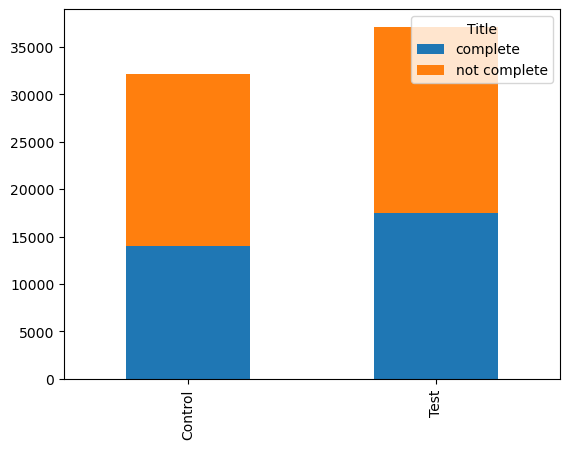

In [43]:
my_df.T.plot(kind = "bar", stacked= True)

INFERENTIAL STATS - TIME SPENT (SUCCESSFUL OP.)

In [170]:
# CONTROL GROUP TYPE
count_control[3]
control_visit_timedelta = pd.DataFrame.from_dict(count_control[3],orient ="index", columns=["timedelta"]).reset_index()
control_visit_timedelta.rename(columns={"index":"visit_id"},inplace=True)

In [171]:
# control_visit_timedelta

In [172]:
webdata_unique_client_id= webdata2.drop_duplicates(subset = ["visit_id"], keep = "first")
# webdata_unique_client_id

In [220]:
control_client_id_timedelta_avg=pd.merge(control_visit_timedelta,webdata_unique_client_id,on="visit_id", how="left")
control_client_id_timedelta_avg = control_client_id_timedelta_avg.groupby("client_id").agg({"timedelta":"mean"})
control_client_id_timedelta_avg.rename(columns={"timedelta":"control_timedelta"}, inplace = True)

In [228]:
# control_client_id_timedelta_avg

In [223]:
control_client_id_timedelta_avg["control_timedelta"]=control_client_id_timedelta_avg["control_timedelta"].apply(lambda x: x.total_seconds()/60)

In [ ]:
control_client_id_timedelta_avg

In [175]:
# TEST GROUP TYPE
count_test[3]
test_visit_timedelta = pd.DataFrame.from_dict(count_test[3],orient ="index", columns=["timedelta"]).reset_index()
test_visit_timedelta.rename(columns={"index":"visit_id"},inplace=True)

In [176]:
# test_visit_timedelta

In [177]:
test_client_id_timedelta_avg=pd.merge(test_visit_timedelta,webdata_unique_client_id,on="visit_id", how="left")
test_client_id_timedelta_avg = test_client_id_timedelta_avg.groupby("client_id").agg({"timedelta":"mean"})
test_client_id_timedelta_avg.rename(columns={"timedelta":"test_timedelta"}, inplace = True)

In [230]:
# test_client_id_timedelta_avg

In [231]:
test_client_id_timedelta_avg["test_timedelta"]=test_client_id_timedelta_avg["test_timedelta"].apply(lambda x: x.total_seconds()/60)

In [ ]:
test_client_id_timedelta_avg

In [235]:
# H0: timespent on a successful op. on: TEST > CONTROL
# H1: timespent on a successful op. on: TEST < CONTROL

alpha = 0.1

st.ttest_ind(test_client_id_timedelta_avg["test_timedelta"], control_client_id_timedelta_avg["control_timedelta"], alternative="less", equal_var=False)

TtestResult(statistic=-1.5090354488727218, pvalue=0.06564997223408618, df=30911.710176684013)

c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='test_timedelta', ylabel='Count'>

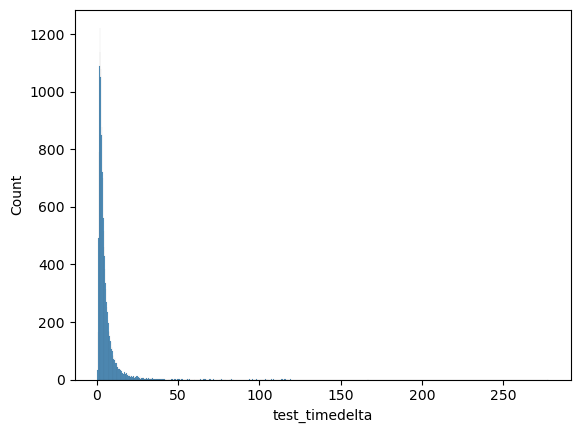

In [236]:
sns.histplot(test_client_id_timedelta_avg, x="test_timedelta")
xlimit

<Axes: xlabel='test_timedelta'>

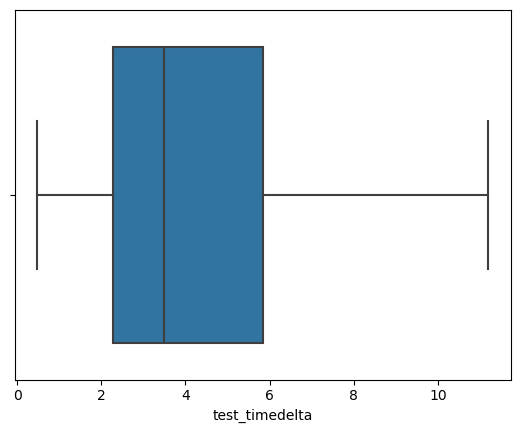

In [238]:
sns.boxplot(test_client_id_timedelta_avg,x="test_timedelta", showfliers=False)

<Axes: xlabel='control_timedelta'>

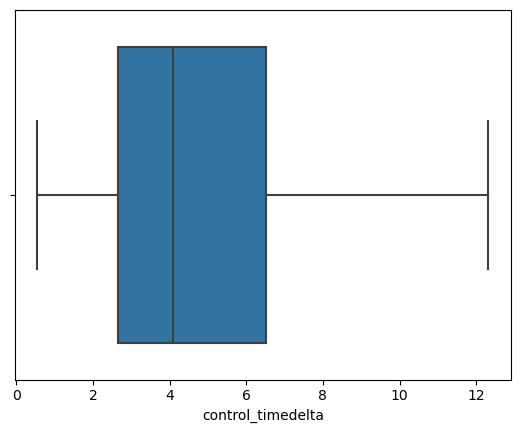

In [240]:
sns.boxplot(control_client_id_timedelta_avg,x="control_timedelta", showfliers=False)

c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='test_timedelta', ylabel='control_timedelta'>

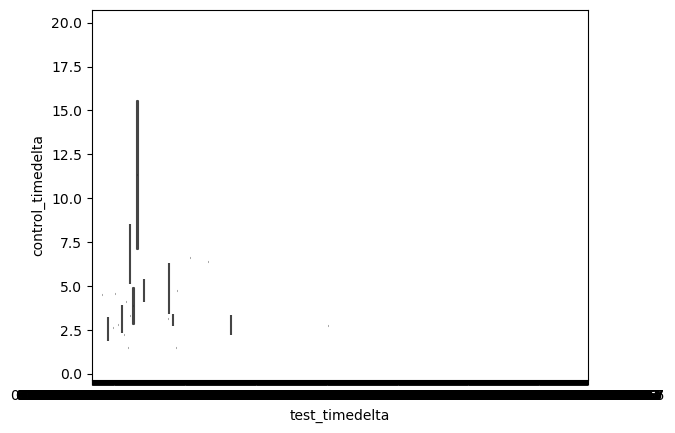

In [242]:
sns.boxenplot(x=test_client_id_timedelta_avg["test_timedelta"],y=control_client_id_timedelta_avg["control_timedelta"], showfliers=False)

In [243]:
test_client_id_timedelta_avg

,test_timedelta
client_id,
555,2.633333
647,6.283333
1336,3.516667
1516,15.900000
1643,11.466667
...,...
9998773,4.916667
9998851,2.750000
9999009,2.850000


In [244]:
# test_client_id_timedelta_avg.to_csv("teste.csv")
# control_client_id_timedelta_avg.to_csv("control.csv")

In [ ]:
# unir df control e teste com a designação noutra coluna, para fazer o gráfico por essa variabel categorical

INFERENTIAL STATS - ERRORS